<a href="https://colab.research.google.com/github/elikapati/DeepLearning/blob/master/SimpleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

27
80
21
88
55
66
62
80
14
83
44
98
27
94
47
85
61
81
25
96
52
90
58
95
40
87
27
93
14
79
52
78
16
96
50
80
62
95
41
90
52
99
27
82
64
75
29
93
46
95
50
93
58
98
38
66
48
78
14
80
31
73
49
98
38
77
58
95
24
77
20
66
51
90
13
73
26
86
59
76
15
76
36
78
57
95
38
98
24
82
28
65
62
89
58
94
19
95
44
100
64
85
44
82
34
99
46
82
28
70
25
86
58
76
42
74
37
71
49
86
46
74
45
74
27
66
28
75
56
83
28
71
43
91
50
67
40
69
22
76
19
99
25
95
46
95
23
83
45
77
49
98
34
72
46
82
43
69
58
95
45
96
50
93
57
91
38
66
17
87
64
69
56
86
37
80
18
92
35
99
59
69
43
89
20
96
19
71
37
73
32
95
28
85
50
71
61
77
22
90
56
99
46
92
33
76
48
67
53
73
33
82
34
85
43
95
50
88
51
93
37
83
49
76
53
94
18
67
55
86
57
84
16
93
26
91
20
85
34
86
38
82
40
87
49
82
56
77
53
71
46
94
56
95
64
99
33
82
14
72
39
71
58
98
27
85
40
99
13
99
39
100
27
77
21
96
54
69
21
79
50
90
28
98
62
66
59
92
25
99
32
85
46
94
45
66
41
97
50
99
27
99
49
79
50
95
22
65
52
79
26
79
33
93
60
77
23
93
63
91
18
68
38
75
20
75
35
97
56
71
41
77
46

Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 1s - loss: 0.7205 - acc: 0.3700
Epoch 2/20
 - 0s - loss: 0.6760 - acc: 0.5362
Epoch 3/20
 - 0s - loss: 0.6382 - acc: 0.6486
Epoch 4/20
 - 0s - loss: 0.6050 - acc: 0.7090
Epoch 5/20
 - 0s - loss: 0.5758 - acc: 0.7414
Epoch 6/20
 - 0s - loss: 0.5467 - acc: 0.7829
Epo

OSError: ignored

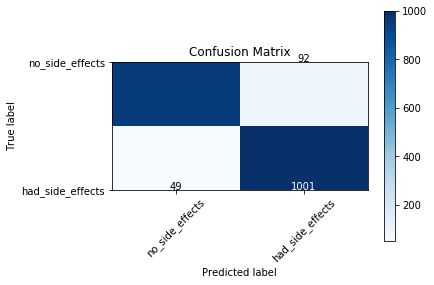

In [0]:
# Simple program to show the total life cycle of training, splitting and predicting usnig keras with Theano as backend

import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

#### Preprocess Data

train_labels = []
train_samples = []

# Example data:
#    - An experimental drug was tested on individuals from ages 13 to 65
#    - The trial had 2100 participants. Half were under 65 years old, half were over 65 years old
#    - 95% of patients 65 or oder experienced side effects
#    - 95% of patients under 65 experienced no side effects

for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

for i in train_samples:
    print(i)

for i in train_labels:
    print(i)

# Convert from list object to array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))

for i in scaled_train_samples:
    print(i)

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(16, input_shape=(1, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting model on entire data (without sparing validation set)
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

# Fitting model splitting data into training and validation
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

#### Predict

# Prepare test data
test_labels = []
test_samples = []

# Prepare test data
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(train_labels)
test_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform((train_samples).reshape(-1, 1))

predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

for i in predictions:
    print(i)

rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

for i in rounded_predictions:
    print(i)

#### Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

cm = confusion_matrix(test_labels, rounded_predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
       Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#### Save and Load Model

#### 1) model.save()

# Saving entire model (including weights, optimizer)
model.save('data/medical_trial_model.h5')

from keras.models import load_model
new_model = load_model('data/medical_trial_model.h5')

new_model.summary()

new_model.get_weights()

new_model.optimizer

#### 2) model.to_json()

# Saving just model
json_string = model.to_json()

json_string

from keras.models import model_from_json

model_architecture = model_from_json(json_string)

model_architecture.summary()

#### 3) model.save_weights()

# Saving only weights
model.save_weights('data/medical_trial_model.h5')

model2 = Sequential([
    Dense(16, input_shape=(1, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model2.load_weights('data/medical_trial_model.h5')